In [2]:
import numpy as np
import pandas as pd

## STEPS:
    0. Get Data
    1. Data cleaning
    2. EDA
    3. Text processing
    4. Model Building
    5. Evaluation 
    6. Improvement
    7. Website
    8. Deployment

### 0. Get Data

In [3]:
df = pd.read_csv('data/spam.csv')


In [4]:
df.shape

(5572, 5)

In [5]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### 1.Data Cleaning 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Drop last 3 columns as they dont contain much data
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#Rename the columns : v1-> target, v2 -> text
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [10]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#Lets apply encoder to target
from sklearn.preprocessing import LabelEncoder

In [12]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# Check for missing values
df.isnull().sum()
#No missing values

target    0
text      0
dtype: int64

In [15]:
#Check for duplicate values
df.duplicated().sum()
#403 values are duplicated, have to remove those

403

In [16]:
df.drop_duplicates(keep = 'first', inplace= True)
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

### 2.EDA

In [19]:
df['target'].value_counts()
#The dataset is imbalanced

0    4516
1     653
Name: target, dtype: int64

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sumanth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
#Create 3 more columns for no. of characters, words ,sentences in the text
nltk.word_tokenize(df['text'][0])
len(df['text'][0])

111

In [23]:
df['num_characters'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [26]:
df.head(2)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8


In [27]:
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.923776,18.456375,1.962275
std,0.332253,58.174846,13.323322,1.433892
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [30]:
#Lets analyse Spam(1) & Ham(0) indiviually 
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#For Spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [32]:
#The number of words,character & senetences is usually more for a SPAM than HAM
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

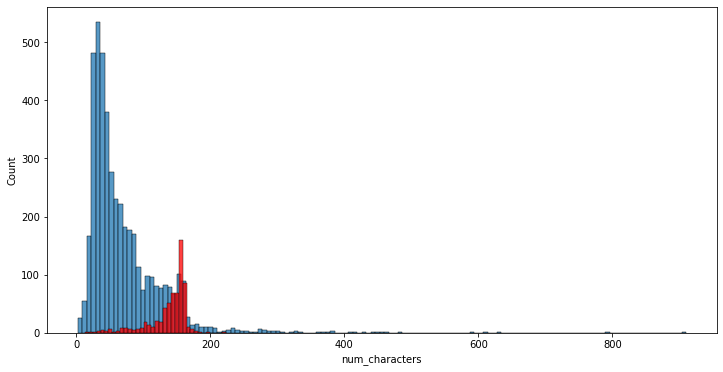

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<AxesSubplot:>

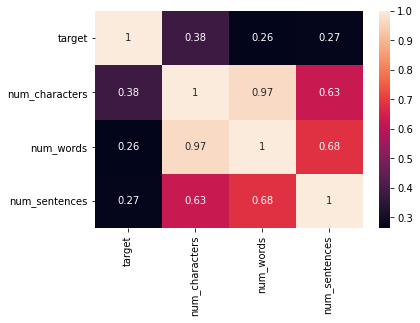

In [34]:
sns.heatmap(df.corr(),annot=True)

In [35]:
# 1. num_characters has more correlation with the target
# 2. num_characters and num_words are very closely correlated 

<Figure size 864x864 with 0 Axes>

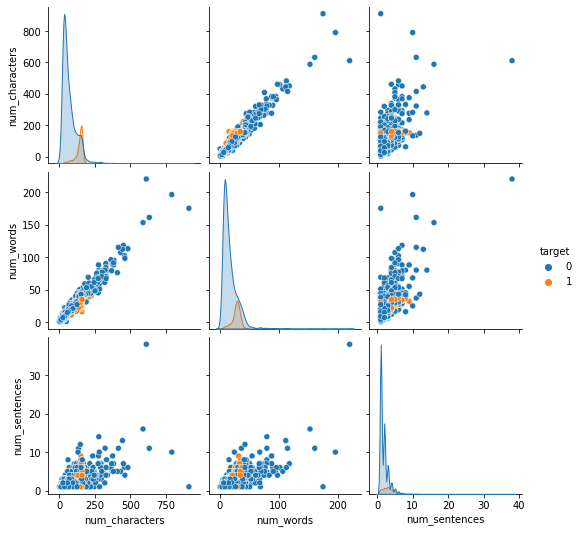

In [36]:
plt.figure(figsize=(12,12))
sns.pairplot(df,hue='target')

In [37]:
#There are few outliers in the data

### 3. Data Preprocessing
    1. Lower case
    2. Tokenization
    3. Removing special characters
    4. Removing stop words & punctuation
    5. Stemming

In [38]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sumanth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [c for c in text if c.isalnum()]
    inter = []
    
    for i in text:
        if i not in stopwords.words('english'):
            inter.append(i)
    text = inter[:]
    
    ps = PorterStemmer()
    inter.clear()
    
    for i in text:
        inter.append(ps.stem(i))
    
    text = inter[:]
    
    return " ".join(text)

In [40]:
transform_text(df['text'][10])
#transform_text("Congrats You got free iphone")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [41]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [42]:
df['transformed_text'] = df['text'].apply(transform_text)

In [43]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
wc = WordCloud(width= 1750, height= 1750, min_font_size= 10 , background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

In [51]:
plt.figure(figsize=(12,9))
plt.imshow(spam_wc)

NameError: name 'spam_wc' is not defined

<Figure size 864x648 with 0 Axes>

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,9))
plt.imshow(ham_wc)

In [52]:
spam_corpus = []
for i in df[df['target'] == 1]['transformed_text'].tolist():
    for word in i.split():
        spam_corpus.append(word)

In [53]:
len(spam_corpus)

9941

In [54]:
ham_corpus = []
for i in df[df['target'] == 0]['transformed_text'].tolist():
    for word in i.split():
        ham_corpus.append(word)

In [55]:
len(ham_corpus)

35303

c:\users\sumanth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


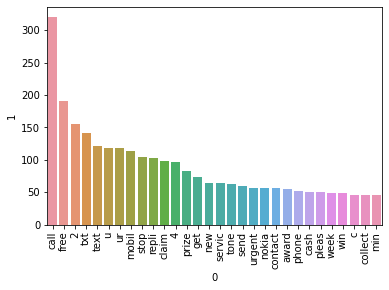

In [56]:
from collections import Counter
#pd.DataFrame(Counter(spam_corpus).most_common(30))[0]
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

c:\users\sumanth\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


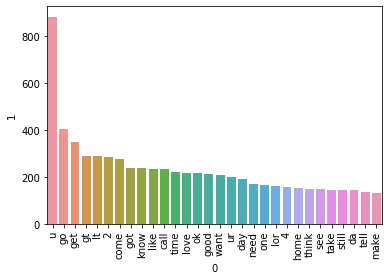

In [57]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### 4. Model Building

In [91]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
cv = CountVectorizer()
#instead of Countvectrizer lets use tf-ids
#tfidf = TfidfVectorizer()

In [92]:
df['transformed_text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transformed_text, Length: 5169, dtype: object

In [108]:
#X = cv.fit_transform(df['transformed_text']).toarray()
X = df['transformed_text']

In [109]:
X.shape

(5169,)

In [110]:
X[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [111]:
y=df['target'].values

In [112]:
y.shape

(5169,)

In [128]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [129]:
X_train = cv.fit_transform(X_train).toarray()
X_test = cv.transform(X_test).toarray()

In [130]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [131]:
def train(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model}")
    print(f"Accuracy : {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Confusion matrix: \n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report: {classification_report(y_test, y_pred)}")
    

In [132]:
train(gnb, X_train, y_train, X_test, y_test)

Model: GaussianNB()
Accuracy : 0.8665377176015474
Precision: 0.5142857142857142
Confusion matrix: 
[[770 119]
 [ 19 126]]
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.87      0.92       889
           1       0.51      0.87      0.65       145

    accuracy                           0.87      1034
   macro avg       0.75      0.87      0.78      1034
weighted avg       0.91      0.87      0.88      1034



In [133]:
train(bnb, X_train, y_train, X_test, y_test)

Model: BernoulliNB()
Accuracy : 0.9661508704061895
Precision: 0.9824561403508771
Confusion matrix: 
[[887   2]
 [ 33 112]]
Classification Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.98      0.77      0.86       145

    accuracy                           0.97      1034
   macro avg       0.97      0.89      0.92      1034
weighted avg       0.97      0.97      0.96      1034



In [134]:
train(mnb, X_train, y_train, X_test, y_test)

Model: MultinomialNB()
Accuracy : 0.9796905222437138
Precision: 0.9492753623188406
Confusion matrix: 
[[882   7]
 [ 14 131]]
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.99       889
           1       0.95      0.90      0.93       145

    accuracy                           0.98      1034
   macro avg       0.97      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [135]:
from sklearn.ensemble import RandomForestClassifier

In [136]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [137]:
class_weights = {0:1, 1:7}
rf = RandomForestClassifier(n_jobs=-1, class_weight= class_weights)
train(rf, X_train, y_train, X_test, y_test)

Model: RandomForestClassifier(class_weight={0: 1, 1: 7}, n_jobs=-1)
Accuracy : 0.9642166344294004
Precision: 1.0
Confusion matrix: 
[[889   0]
 [ 37 108]]
Classification Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       1.00      0.74      0.85       145

    accuracy                           0.96      1034
   macro avg       0.98      0.87      0.92      1034
weighted avg       0.97      0.96      0.96      1034



In [84]:
import pickle

In [85]:
pickle.dump(rf,open("model_rf.pkl",'wb'))

In [86]:
pickle.dump(tfidf, open("tfidf.pkl", 'wb'))

In [162]:
transformed_text = transform_text(df.iloc[2,1])
#print(transformed_text)
#2.Vectorize
vector_input = cv.transform([transformed_text])
#print(vector_input)
rf.predict(vector_input)

array([1])

In [151]:
X_test[93].sum(), y_test[93]

(12, 1)

In [163]:
#rf.predict(X_test[93])

In [160]:
df.iloc[2,1]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"